Shape: (150, 5)

Missing values:
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Summary stats:
        SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


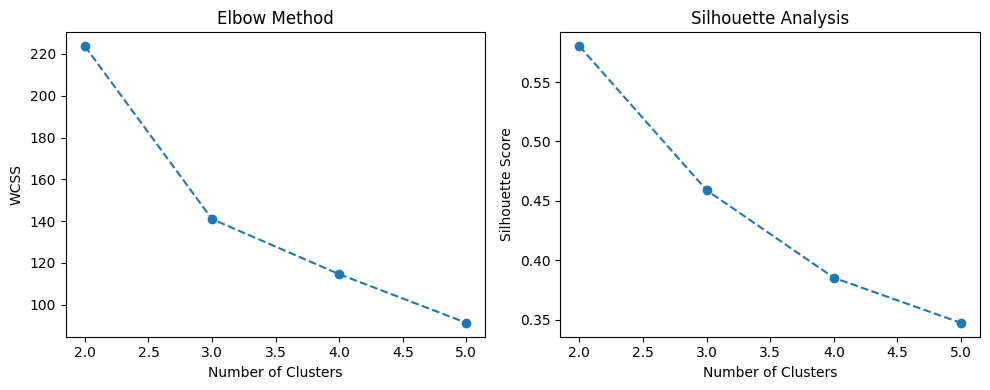

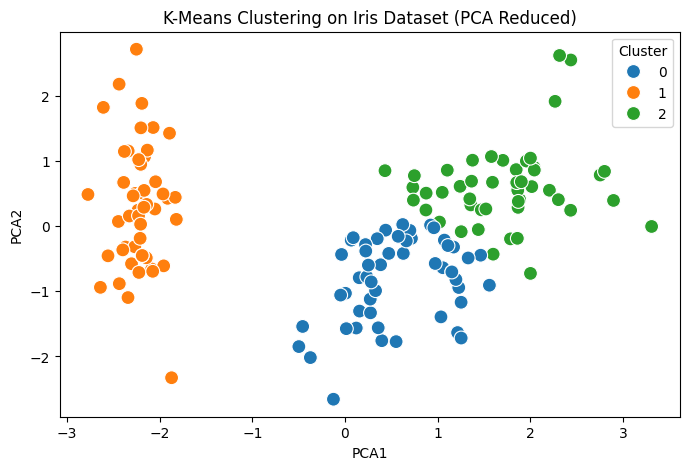

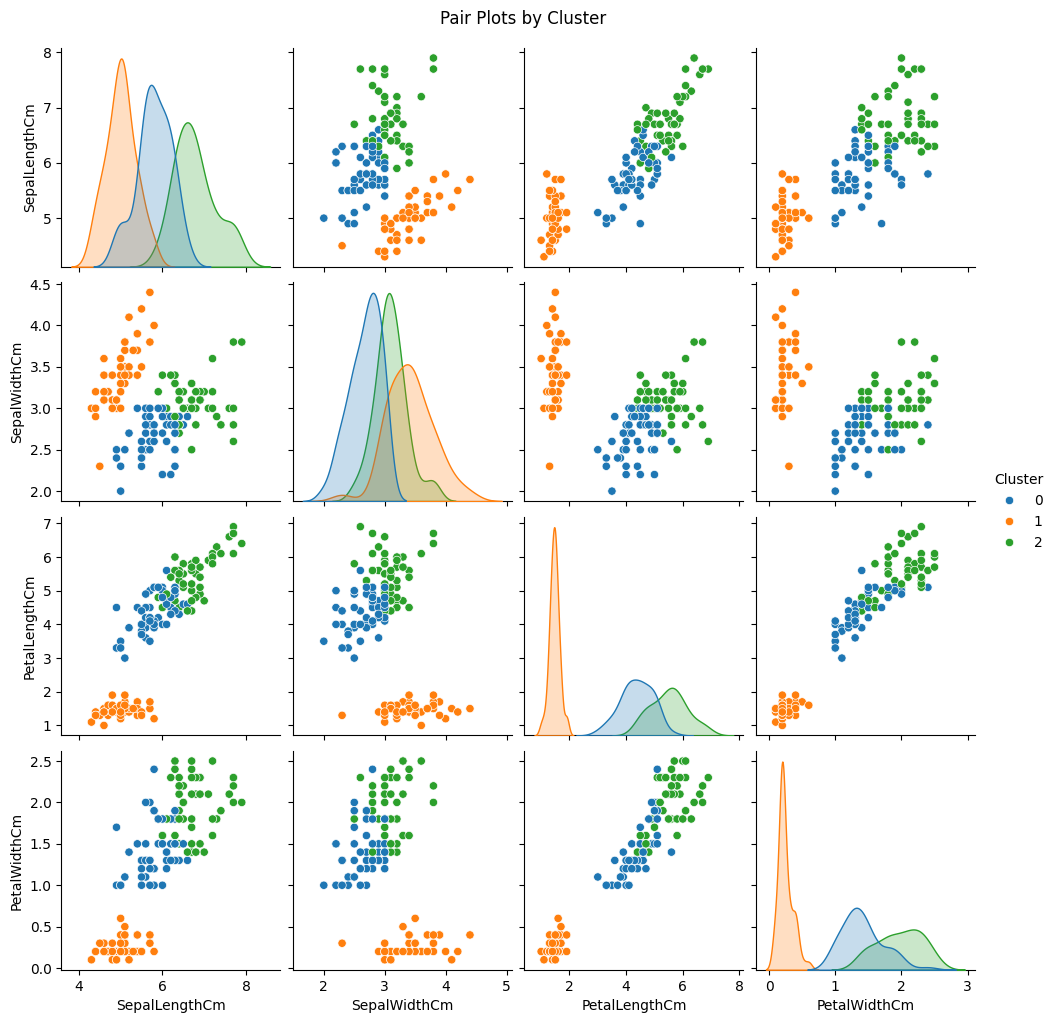


Cluster Profiles:
          SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      PCA1  \
Cluster                                                                       
0             5.801887      2.673585       4.369811      1.413208  0.567138   
1             5.006000      3.418000       1.464000      0.244000 -2.220193   
2             6.780851      3.095745       5.510638      1.972340  1.722369   

             PCA2  
Cluster            
0       -0.807675  
1        0.292225  
2        0.599905  

Insights:
- Cluster 0: Likely corresponds to Iris-setosa (smaller petal dimensions).
- Cluster 1: Likely corresponds to Iris-versicolor (medium petal dimensions).
- Cluster 2: Likely corresponds to Iris-virginica (larger petal dimensions).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import os

# Step 1: Load the Dataset
file_path = "Iris.csv"  # Assuming the file is in the same directory as the script

# Ensure the file exists
if not os.path.exists(file_path):
    print(f"Error: File '{file_path}' not found. Please check the file location.")
    exit()

df = pd.read_csv(file_path)

# Drop the 'Id' column as it is not needed
df.drop(columns=['Id'], inplace=True)

# Inspect data
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nSummary stats:\n", df.describe())

# Extract features for clustering
X = df.iloc[:, :-1]  # Excluding the target column 'Species'

# Step 2: Standardizing the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Determine the optimal number of clusters using Elbow Method and Silhouette Score
wcss = []
silhouette_scores = []
k_range = range(2, 6)  # Testing k from 2 to 5

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot the Elbow Method
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.tight_layout()
plt.show()

# Step 4: Apply K-Means Clustering with optimal k (k=3 for Iris dataset)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 5: Visualize Clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='tab10', data=df, s=100)
plt.title('K-Means Clustering on Iris Dataset (PCA Reduced)')
plt.show()

# Pair Plots
sns.pairplot(df, vars=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], hue='Cluster', palette='tab10')
plt.suptitle('Pair Plots by Cluster', y=1.02)
plt.show()

# Cluster Profiles (Fix for non-numeric data issue)
numeric_cols = df.select_dtypes(include=[np.number]).columns  # Select only numeric columns
cluster_profile = df[numeric_cols].groupby('Cluster').mean()  # Compute mean only for numeric data
print("\nCluster Profiles:\n", cluster_profile)

# Step 6: Insights
print("\nInsights:")
print("- Cluster 0: Likely corresponds to Iris-setosa (smaller petal dimensions).")
print("- Cluster 1: Likely corresponds to Iris-versicolor (medium petal dimensions).")
print("- Cluster 2: Likely corresponds to Iris-virginica (larger petal dimensions).")


In [1]:
print("Amit Kumar Jha")

Amit Kumar Jha
